In [1]:
import os

In [32]:
combo.to_csv('ppl_comparison.csv')

In [2]:
import pandas
from matplotlib import pyplot
from adjustText import adjust_text


In [15]:
df = pandas.read_csv('results.csv', sep='\t')
df.head()

,batch_size,cell_size,context_embed_size,context_embed_sizes,context_vars,dir,disable_bloom,dropout_keep_prob,embedding_dims,finish_time,...,max_len,min_vocab_count,nce_samples,ppl,splitter,use_hash_table,use_hyper_adaptation,use_mikolov_adaptation,use_softmax_adaptation,val_data
0,400,240,NaN,[25],[u'subreddit'],exps/newstrat13,False,1.0,200,1.491706e+09,...,35,20,100,66.522,word,True,False,True,True,NaN
1,400,240,NaN,[25],[u'subreddit'],exps/newstrat9,False,1.0,200,1.491813e+09,...,35,20,100,66.866,word,True,False,False,True,NaN
2,400,240,NaN,[25],[u'subreddit'],exps/newstrat5,False,1.0,200,1.491688e+09,...,35,20,100,66.924,word,True,False,True,False,NaN
3,400,240,NaN,[25],[u'subreddit'],exps/newstrat15,False,1.0,200,1.491827e+09,...,35,20,100,67.109,word,True,True,True,True,NaN
4,400,240,NaN,[25],[u'subreddit'],exps/newstrat11,False,1.0,200,1.491710e+09,...,35,20,100,67.210,word,True,True,False,True,NaN


In [18]:
groups = df.groupby(['use_hash_table', 'use_mikolov_adaptation',
                     'use_softmax_adaptation', 'use_hyper_adaptation'])

In [19]:
baseline = 73.296
result = groups.agg({'ppl': 'min', 'batch_size': len}).sort_values('ppl')
result['gain'] = (result.ppl - baseline) / baseline
result

batch_size  \
use_hash_table use_mikolov_adaptation use_softmax_adaptation use_hyper_adaptation               
True           True                   True                   False                          1   
               False                  True                   False                          1   
               True                   False                  False                          1   
                                      True                   True                           1   
               False                  True                   True                           1   
               True                   False                  True                           1   
False          True                   True                   False                          1   
True           False                  False                  True                           1   
False          False                  True                   False                          1   
               True                   True                   True                           1   
                                      False                  False                          1   
               False                  True                   True                           1   
               True                   False                  True                           1   
               False                  False                  True                           1   
True           False                  False                  False                          1   
False          False                  False                  False                          1   

                                                                                      ppl  \
use_hash_table use_mikolov_adaptation use_softmax_adaptation use_hyper_adaptation           
True           True                   True                   False                 66.522   
               False                  True                   False                 66.866   
               True                   False                  False                 66.924   
                                      True                   True                  67.109   
               False                  True                   True                  67.210   
               True                   False                  True                  67.508   
False          True                   True                   False                 67.965   
True           False                  False                  True                  67.998   
False          False                  True                   False                 68.021   
               True                   True                   True                  68.342   
                                      False                  False                 68.440   
               False                  True                   True                  68.783   
               True                   False                  True                  69.005   
               False                  False                  True                  69.439   
True           False                  False                  False                 69.641   
False          False                  False                  False                 75.163   

                                                                                       gain  
use_hash_table use_mikolov_adaptation use_softmax_adaptation use_hyper_adaptation            
True           True                   True                   False                -0.092420  
               False                  True                   False                -0.087726  
               True                   False                  False                -0.086935  
                                      True                   True                 -0.084411  
               False                  True                   True                 -0.083033  
   

In [37]:
baseline = pandas.read_csv('exps/newstrat0/pplsummary.csv')
adapted = pandas.read_csv('exps/newstrat13/pplsummary.csv')

In [38]:
b = baseline.set_index('subreddit')
a = adapted.set_index('subreddit')

In [39]:
combo = a.join(b, lsuffix='_adapted', rsuffix='_baseline')

In [40]:
diff = (combo.ppl_adapted - combo.ppl_baseline) / combo.ppl_baseline

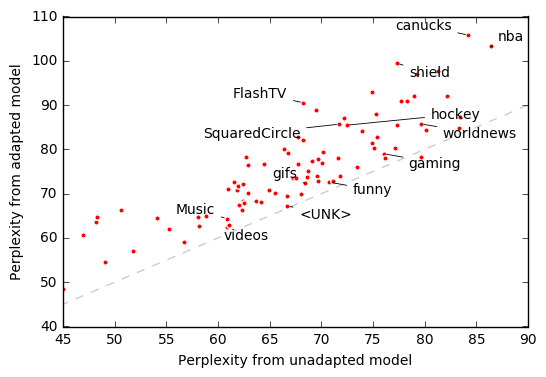

In [41]:
f = pyplot.figure()
scatter = pyplot.scatter(combo.ppl_adapted, combo.ppl_baseline, s=15, c='r', edgecolors='w')
texts = []
labeled_set = set(('nba', 'worldnews', 'hockey', 'FlashTV',
                   'shield', 'videos', 'gaming', 'funny', 'SquaredCircle', 
                   '<UNK>', 'canucks', 'gifs', 'Music'))
for x, y, s in zip(combo.ppl_adapted, combo.ppl_baseline, combo.index.values):
    if s in labeled_set:
        texts.append(pyplot.text(x, y, s))
pyplot.plot([30, 110], [30, 110], '--', color='k', alpha=0.2)


adjust_text(texts, force_points=0.2, force_text=0.02, expand_points=(1.2,1.2), expand_text=(1.1,1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.6))

pyplot.xlim([45, 90])
pyplot.ylim([40, 110])
pyplot.xlabel('Perplexity from unadapted model')
pyplot.ylabel('Perplexity from adapted model')
pyplot.show()
#pyplot.savefig('foo.svg', bbox_inches='tight')

In [42]:
combo['diff'] = diff * 100

In [43]:
combo = combo.sort_values('diff')
combo

,Unnamed: 0_adapted,length_adapted,ppl_adapted,Unnamed: 0_baseline,length_baseline,ppl_baseline,diff
subreddit,,,,,,,
newsokur,3009,154,5.047038,3009,154,15.787247,-68.030919
Fireteams,661,298,13.511844,661,298,29.122181,-53.602914
Pokemongiveaway,1288,186,29.412108,1288,186,50.303095,-41.530221
ACTrade,30,126,33.725154,30,126,53.129434,-36.522656
SVExchange,1414,104,27.847588,1414,104,42.205625,-34.019249
XMenRP,1817,118,48.284964,1817,118,64.827762,-25.518077
CampHalfBloodRP,337,124,44.699231,337,124,59.336573,-24.668331
FlashTV,667,627,68.247537,667,627,90.522895,-24.607430
TheDescendantsOfRome,1609,110,48.150713,1609,110,63.584865,-24.273312


In [50]:
comments = {
    'FlashTV': 'A popular TV show',
    'leagueoflegends': 'A PC video game',
    'GlobalOffensive': 'A PC video game',
    'nfl': 'National Football League',
    'nba': 'National Basketball Association',
    'hockey': 'Professional hockey',
    'pcmasterrace': 'PC gaming',
    'SquaredCircle': 'Professional Wrestling',
    'pics': 'Funny or interesting pictures',
    'videos': 'Funny or interesting videos',
    'AskReddit': 'Misc. discussion',
    'todayilearned': 'Sharing of interesting facts',
    'funny': 'Sharing humorous content',
    'news': 'General news stories and discussion',
    'AdviceAnimals': '',
    '<UNK>': 'Small subreddits grouped here',
    'relationships': 'Relationship advice',
    'politics': 'U.S. politics discussion',
    'gaming': 'General video games interest group',
    'AdviceAnimals': 'Funny captioned images',
    'worldnews': 'Global news discussion',
    'shield': 'A tv show',
    'AskMen': 'Questions for men',
    'AskWomen': 'Questions for women',
    'ChangeMyView': 'Causal debate',
    'Fitness': 'Exercise and fitness',
    'askscience': 'Science related questions'
}
for i in range(len(combo)):
    row = combo.iloc[i]
    comment = comments.get(row.name, '')
    if row.name not in comments:
        continue
    columns = (row.name, '{0:.1f}'.format(row.ppl_baseline),
               '{0:.1f}'.format(row.ppl_adapted), '{0:.1f}\\%'.format(-row['diff']), comment)
    print ' & '.join(columns) + ' \\\\'

FlashTV & 90.5 & 68.2 & 24.6\% & A popular TV show \\
shield & 99.4 & 77.3 & 22.2\% & A tv show \\
GlobalOffensive & 97.1 & 79.3 & 18.3\% & A PC video game \\
nba & 103.3 & 86.4 & 16.3\% & National Basketball Association \\
SquaredCircle & 85.7 & 71.7 & 16.3\% & Professional Wrestling \\
Fitness & 50.1 & 42.3 & 15.5\% & Exercise and fitness \\
hockey & 85.5 & 72.4 & 15.2\% & Professional hockey \\
leagueoflegends & 71.1 & 61.0 & 14.3\% & A PC video game \\
pcmasterrace & 71.7 & 62.0 & 13.5\% & PC gaming \\
nfl & 84.2 & 74.0 & 12.2\% & National Football League \\
AskWomen & 62.1 & 55.3 & 10.9\% & Questions for women \\
relationships & 54.6 & 49.1 & 10.2\% & Relationship advice \\
politics & 78.1 & 71.6 & 8.3\% & U.S. politics discussion \\
news & 70.8 & 65.0 & 8.2\% & General news stories and discussion \\
worldnews & 85.7 & 79.7 & 7.1\% & Global news discussion \\
AskReddit & 73.9 & 69.5 & 5.9\% & Misc. discussion \\
AskMen & 69.4 & 66.7 & 3.9\% & Questions for men \\
gaming & 79.0 & 7

In [ ]:
type(row.diff)

In [ ]:
d = df[['ppl', 'finish_time']]

In [ ]:
d = d.sort_values('finish_time').reset_index()

In [ ]:
d['best'] = d.ppl.cummin()

In [ ]:
result = d.groupby('best').finish_time.agg(min)

In [ ]:
pyplot.plot(pandas.to_datetime(result.values * 1000000000), result.index.values)
fig = pyplot.gcf()
fig.autofmt_xdate()
pyplot.show()

In [ ]:
df.ppl[df.use_hyper_adaptation].median()